In [23]:
import os
import pandas as pd
import sys
import json


from collaborative_filtering import fit_collaborative_filtering

cwd= os.getcwd() # current working directory
path = os.path.join(cwd,'Amazinum\Data\Lesson16') 
file_name = os.path.join(path ,  'ratings_small.csv')
df_filmtrust= pd.read_csv(file_name)
print (len(df_filmtrust))
df_filmtrust

100004


,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


In [24]:
import numpy as np
def convert_to_matrix(df, values, index, columns):
    '''
        e.g. values='average_msv', index='phrase', columns='locode' 
    '''
    df_target=df.pivot_table(values=values, index=index, columns=columns, aggfunc=np.max, dropna= False)
    return df_target


df_target = convert_to_matrix(df_filmtrust, values='rating', index='movieId', columns='userId')
df_target

userId,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
movieId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,4.0,NaN,...,NaN,4.0,3.5,NaN,NaN,NaN,NaN,NaN,4.0,5.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
Y= df_target.fillna(0) 
R= df_target.applymap(lambda x: 0 if np.isnan(x) else 1)

scale = Y.max() - Y.min()
Y_scaled = Y / scale * 10
Y_scaled

userId,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,8.0,0.0,...,0.0,8.0,7.0,0.0,0.0,0.0,0.0,0.0,8.0,10.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162542,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
X, Theta, J_hist = fit(Y_scaled.values, R.values, num_features=20, alpha=0.0005, lambd=1, max_iter=2000,
                           eps=.01, step=50, verbose=1)

Running gradient descent with alpha= 0.0005, lambda= 1, eps= 0.01, max_iter= 2000
50: 695233.2550129171
100: 414273.01930847444
150: 330666.1714671333
200: 284081.06434360717
250: 250785.53964927688
300: 225742.09259263246
350: 206012.5987216212
400: 189973.83683955445
450: 176646.8496963419
500: 165403.90052183543
550: 155817.87132271915
600: 147580.77906459838
650: 140458.01498896873
700: 134261.8355142319
750: 128836.22964787004
800: 124049.05440440033
850: 119788.65108165724
900: 115962.5731626479
950: 112496.53729517321
1000: 109332.57940928459
1050: 106426.35757140213
1100: 103744.11161581999
1150: 101259.83392088767
1200: 98952.96675651391
1250: 96806.69741510222
1300: 94806.78346112579
1350: 92940.79128604814
1400: 91197.62898308456
1450: 89567.27187848926
1500: 88040.60303252898
1550: 86609.31523729995
1600: 85265.84172784309
1650: 84003.29816192409
1700: 82815.42828962859
1750: 81696.55113753665
1800: 80641.50989966252
1850: 79645.62336086111
1900: 78704.64051790697
1950: 778

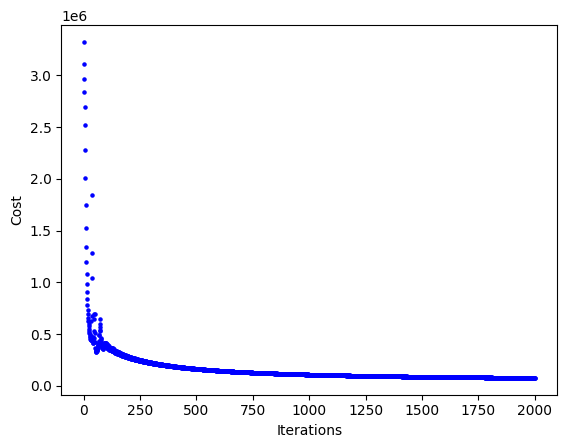

In [28]:
%matplotlib inline 
import matplotlib.pyplot as plt
def draw_cost_changes(J_hist):
    J_hist=J_hist[1:]
    plt.figure()
    plt.scatter(np.arange(0,len(J_hist)),J_hist,s=20,marker='.',c='b')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
#     title_str = 'Complited: {}, alpha ={}, max_iter={}, eps={}'.format( len(self.J_hist)-2, self.alpha, self.max_iter,self.eps)
#     # Note: len(J_hist)-2) due to first one is -1 (was not iteration), iter + 1  at the end  of the gradient loop
#     plt.title(title_str)


draw_cost_changes(J_hist)

In [29]:
pred = X @ Theta
pred_rescaled = pred * scale.values / 10
pred_rescaled

array([[ 2.4623534 ,  3.29619624,  3.52890698, ...,  3.98430336,
         3.90436117,  4.60213466],
       [ 1.27093019,  4.47269862,  2.65575118, ...,  3.19989179,
         3.99368995,  4.38535197],
       [ 2.13640606,  4.06942659,  1.85574416, ...,  3.05824148,
         4.54110945,  2.82232287],
       ...,
       [-0.52207364, -0.39731049,  1.85341885, ...,  0.45323249,
         0.23171201,  0.01131202],
       [-0.26510626,  0.81810139, -0.02645612, ...,  0.0255076 ,
         0.09531586,  1.08204357],
       [-1.10446885, -0.19054196, -0.68495948, ...,  0.22708042,
        -0.3086921 ,  0.66374375]])

In [31]:
df_results_pivot= pd.DataFrame(pred_rescaled , index= Y.index, columns = Y.columns)
df_results_pivot_temp= pd.DataFrame(df_results_pivot.to_records())
df_results = pd.melt(df_results_pivot_temp, 
            id_vars='movieId', 
            value_vars=list(df_results_pivot_temp.columns[1:]), 
            var_name='userId', 
            value_name='rating_pred')
df_results

,movieId,userId,rating_pred
0,1,1,2.462353
1,2,1,1.270930
2,3,1,2.136406
3,4,1,2.122901
4,5,1,1.948395
...,...,...,...
6083281,161944,671,1.795136
6083282,162376,671,2.853030
6083283,162542,671,0.011312
6083284,162672,671,1.082044


In [32]:
existing_unique_values = np.array(sorted(df_filmtrust['rating'].unique()))
def round_to_existing(val):
    return existing_unique_values[np.argmin(np.abs(existing_unique_values-val))]

df_results['rating_round']= df_results['rating_pred'].apply(round_to_existing)
df_results

,movieId,userId,rating_pred,rating_round
0,1,1,2.462353,2.5
1,2,1,1.270930,1.5
2,3,1,2.136406,2.0
3,4,1,2.122901,2.0
4,5,1,1.948395,2.0
...,...,...,...,...
6083281,161944,671,1.795136,2.0
6083282,162376,671,2.853030,3.0
6083283,162542,671,0.011312,0.5
6083284,162672,671,1.082044,1.0


In [33]:
df_results['userId']= df_results['userId'].astype(int)
df_eval= df_filmtrust.merge(df_results, on=['userId','movieId'])
df_eval

,userId,movieId,rating,timestamp,rating_pred,rating_round
0,1,31,2.5,1260759144,2.451583,2.5
1,1,1029,3.0,1260759179,2.765755,3.0
2,1,1061,3.0,1260759182,2.924645,3.0
3,1,1129,2.0,1260759185,1.846625,2.0
4,1,1172,4.0,1260759205,3.879277,4.0
...,...,...,...,...,...,...
99999,671,6268,2.5,1065579370,2.447098,2.5
100000,671,6269,4.0,1065149201,3.840445,4.0
100001,671,6365,4.0,1070940363,4.034517,4.0
100002,671,6385,2.5,1070979663,2.611024,2.5


0.8102080840070559
mean error = 0.3163087844394946, max error = 5.9479365503440205


<AxesSubplot: >

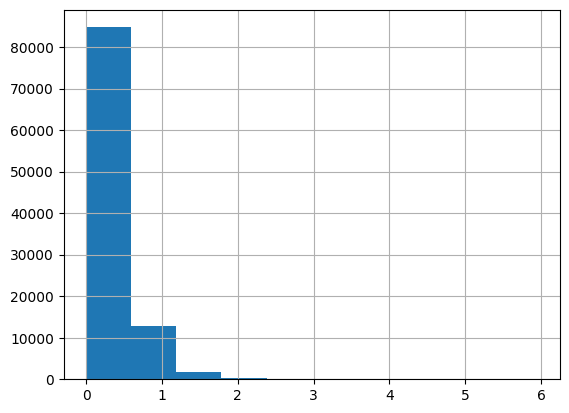

In [34]:
from sklearn.metrics import r2_score
print (r2_score(df_eval['rating'], df_eval['rating_pred']))

df_eval['diff'] = df_eval['rating']- df_eval['rating_pred']
df_eval['diff']= df_eval['diff'].apply(np.abs)
print ('mean error = {}, max error = {}'.format(df_eval['diff'].mean(), df_eval['diff'].max()) )
df_eval['diff'].hist()

0.8220441410980595
mean error = 0.2667843286268549, max error = 4.0


<AxesSubplot: >

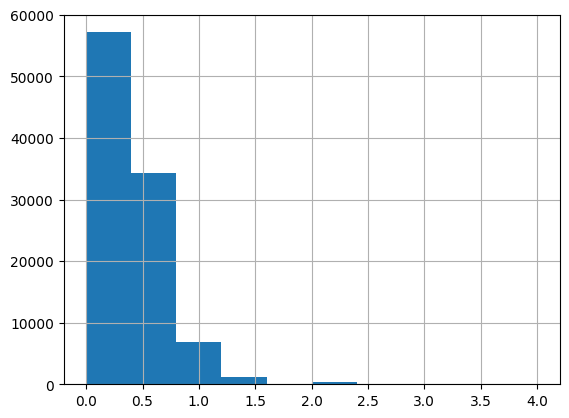

In [35]:
print (r2_score(df_eval['rating'], df_eval['rating_round'])  )
df_eval['diff'] = df_eval['rating']- df_eval['rating_round']
df_eval['diff']= df_eval['diff'].apply(np.abs)
print ('mean error = {}, max error = {}'.format(df_eval['diff'].mean(), df_eval['diff'].max()) )
df_eval['diff'].hist()

In [36]:
#Evaluate cofi on test set
from sklearn.model_selection import train_test_split 
df_train, df_test= train_test_split (df_filmtrust, test_size = 1000)
df_train.shape,df_test.shape

((99004, 4), (1000, 4))

Running gradient descent with alpha= 0.0005, lambda= 1, eps= 0.01, max_iter= 2000
50: 385886.3425546981
100: 387058.89397686836
150: 309857.388748699
200: 268484.9110966134
250: 238241.89125942922
300: 215561.77587949508
350: 197737.10790226064
400: 183198.0455832135
450: 171022.72397689748
500: 160634.06715740022
550: 151650.97667883057
600: 143809.29835750765
650: 136917.54217454424
700: 130830.35101383177
750: 125431.87070010998
800: 120625.45311446807
850: 116327.81854786366
900: 112466.26599216346
950: 108977.63610723666
1000: 105807.94734224593
1050: 102911.9990834598
1100: 100252.63807327335
1150: 97799.69016116236
1200: 95528.71931044354
1250: 93419.8055041766
1300: 91456.4821186327
1350: 89624.89575965593
1400: 87913.18625613
1450: 86311.04743371149
1500: 84809.41867190113
1550: 83400.2632984203
1600: 82076.40244579344
1650: 80831.38515798762
1700: 79659.38415756734
1750: 78555.1114605554
1800: 77513.7500677499
1850: 76530.89862830154
1900: 75602.52624388011
1950: 74724.934920

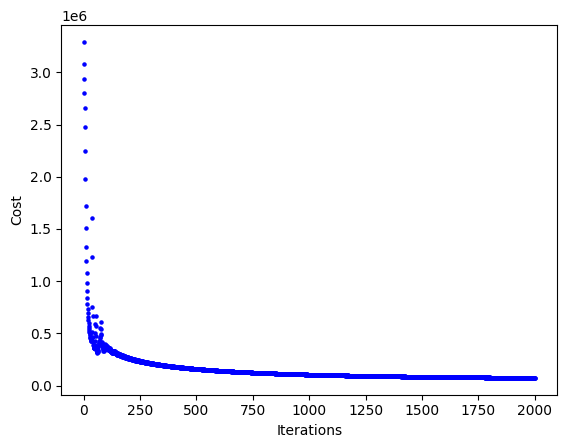

In [38]:
df_target = convert_to_matrix(df_train, values='rating', index='movieId', columns='userId')

Y= df_target.fillna(0) 
R= df_target.applymap(lambda x: 0 if np.isnan(x) else 1)

scale = Y.max() - Y.min()
Y_scaled = Y / scale * 10

X, Theta, J_hist = fit(Y_scaled.values, R.values, num_features=20, alpha=0.0005, lambd=1, max_iter=2000,
                           eps=.01, step=50, verbose=1)
draw_cost_changes(J_hist)

In [39]:
pred = X @ Theta
pred_rescaled = pred * scale.values / 10
pred_rescaled

df_results_pivot= pd.DataFrame(pred_rescaled , index= Y.index, columns = Y.columns)
df_results_pivot_temp= pd.DataFrame(df_results_pivot.to_records())
df_results = pd.melt(df_results_pivot_temp, 
            id_vars='movieId', 
            value_vars=list(df_results_pivot_temp.columns[1:]), 
            var_name='userId', 
            value_name='rating_pred')
df_results

,movieId,userId,rating_pred
0,1,1,2.857469
1,2,1,2.233037
2,3,1,3.830433
3,4,1,1.391330
4,5,1,2.488624
...,...,...,...
6063151,161944,671,1.299245
6063152,162376,671,1.387681
6063153,162542,671,2.278714
6063154,162672,671,1.889390


r2_score= 0.8207742822022731
mean error = 0.3089970283505305, max error = 5.549232452478892


<AxesSubplot: >

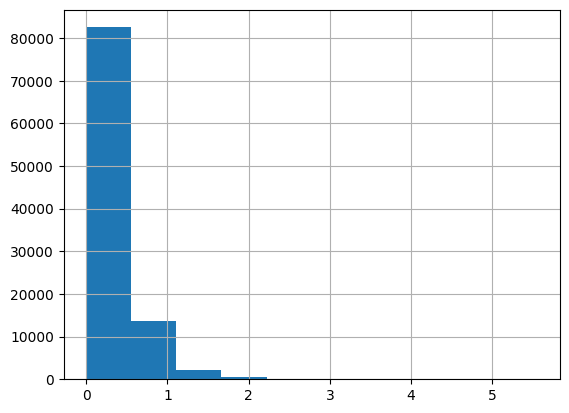

In [40]:
#Evaluate on train set
df_results['userId']= df_results['userId'].astype(int)
df_eval= df_train.merge(df_results, on=['userId','movieId'])

print ('r2_score=', r2_score(df_eval['rating'], df_eval['rating_pred'])  )
df_eval['diff'] = df_eval['rating']- df_eval['rating_pred']

df_eval['diff']= df_eval['diff'].apply(np.abs)
print ('mean error = {}, max error = {}'.format(df_eval['diff'].mean(), df_eval['diff'].max()) )
df_eval['diff'].hist()

In [42]:
#Evaluate on test set
df_results['userId']= df_results['userId'].astype(int)
df_eval= df_test.merge(df_results, on=['userId','movieId'])
df_eval

,userId,movieId,rating,timestamp,rating_pred
0,430,3,1.5,1111488810,3.464928
1,311,4661,4.0,1062101983,3.158914
2,554,1193,5.0,1012750517,4.941540
3,516,1092,3.0,844688162,4.004853
4,130,288,1.0,1138999363,3.225023
...,...,...,...,...,...
965,382,2059,5.0,1371773239,1.307982
966,243,1590,3.5,1094221352,3.405152
967,102,802,3.0,957895047,2.585093
968,528,608,4.0,1141605640,3.898350


r2_score= -0.4519836009649607
mean error = 0.933717982194191, max error = 5.775042311680947


<AxesSubplot: >

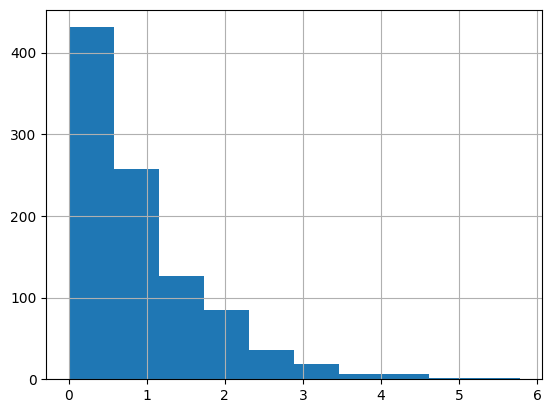

In [43]:
print ('r2_score=', r2_score(df_eval['rating'], df_eval['rating_pred'])  )
df_eval['diff'] = df_eval['rating']- df_eval['rating_pred']

df_eval['diff']= df_eval['diff'].apply(np.abs)
print ('mean error = {}, max error = {}'.format(df_eval['diff'].mean(), df_eval['diff'].max()) )
df_eval['diff'].hist()

In [44]:
print ('r2_score=', r2_score(df_eval['rating'], df_eval['rating_pred'])  )

r2_score= -0.4519836009649607


r2_score= -0.28331531917836283
mean error = 0.8675257731958763, max error = 4.5


<AxesSubplot: >

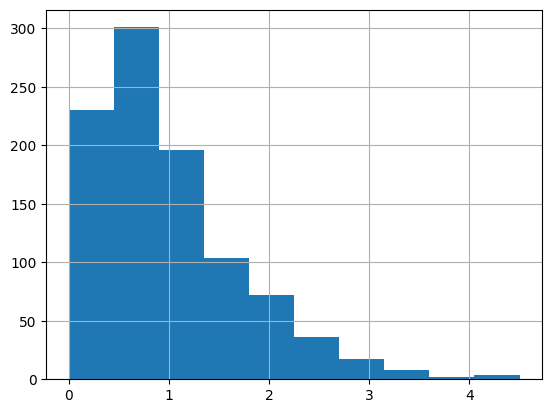

In [46]:
df_results['rating_round']= df_results['rating_pred'].apply(round_to_existing)
df_eval= df_test.merge(df_results, on=['userId','movieId'])
print ('r2_score=', r2_score(df_eval['rating'], df_eval['rating_round'])  )
df_eval['diff'] = df_eval['rating']- df_eval['rating_round']

df_eval['diff']= df_eval['diff'].apply(np.abs)
print ('mean error = {}, max error = {}'.format(df_eval['diff'].mean(), df_eval['diff'].max()) )
df_eval['diff'].hist()